In [1]:
from pathlib import Path
import json
import numpy as np


datapath = Path('data')

position_list = []
motor_list = []
for path_ in datapath.iterdir():
    with open(str(path_), 'r') as f:
        mocap_info = json.load(f)

        
    p_plat = np.array([mocap_info['plat_x'], mocap_info['plat_y'], mocap_info['plat_z']])
    p_ee = np.array([mocap_info['EE_x'], mocap_info['EE_y'], mocap_info['EE_z']])
    p_off = np.array([mocap_info['p_zero'][0], 0, mocap_info['p_zero'][2]])

    position_ = p_ee-p_plat -p_off
    position_list.append(position_)
    motor_list.append(mocap_info['motor_control'])

transform_matrix = np.array(
    [
        [ 0,-1, 0],
        [ 0, 0, 1],
        [-1, 0, 0]
    ]
)

position_array = np.array(position_list) @ transform_matrix
motor_array = np.array(motor_list)

Text(0.5, 0, 'Z Label')

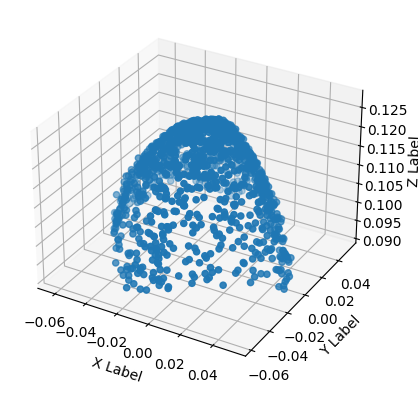

In [2]:

from matplotlib import pyplot as plt
# create plt 3d plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot position_array
ax.scatter(position_array[:,0], position_array[:,1], position_array[:,2])

# plot axis as x,y,z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [3]:
motor_array.shape, 

((1259, 2, 1),)

In [4]:
temp = position_array * np.array([1,-1,1])
temp.shape

(1259, 3)

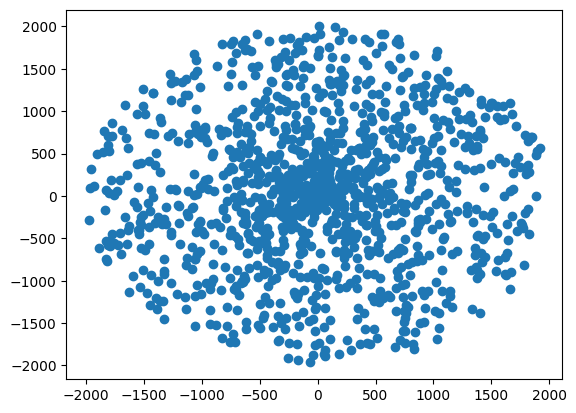

In [5]:

plt.scatter(motor_array[:,0,0],motor_array[:,1,0])

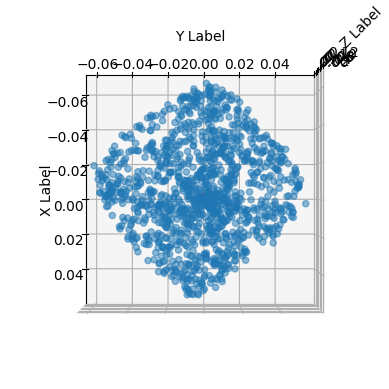

In [6]:
from matplotlib import pyplot as plt
# create plt 3d plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot position_array
ax.scatter(0,0,0, c='r', s=80)
ax.scatter(position_array[:,0], position_array[:,1], position_array[:,2], alpha = 0.5)


# plot axis as x,y,z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# change view
ax.view_init(90,0)

In [7]:
position_array.shape, motor_array.shape

((1259, 3), (1259, 2, 1))

In [8]:
motor_norm_array = np.linalg.norm(motor_array,axis=1)

idxs = np.argsort(motor_norm_array.flatten())

motor_array_sorted = motor_array[idxs].reshape(-1,2)
position_array_sorted = position_array[idxs].reshape(-1,1,3)

motor_array_sorted.shape, position_array_sorted.shape

((1259, 2), (1259, 1, 3))

In [9]:
interpolation_data_number = int(len(motor_array_sorted) * 0.7)

interpolation_motor_array_sorted = motor_array_sorted[:interpolation_data_number]
interpolation_position_array_sorted = position_array_sorted[:interpolation_data_number]


extrapolation_motor_array_sorted = motor_array_sorted[interpolation_data_number:]
extrapolation_position_array_sorted = position_array_sorted[interpolation_data_number:]


In [10]:
# fix seed
import random
np.random.seed(0)
random.seed(0)

train_data={}
val_data={}
test_data={}
ext_data={}

perm_idx = np.random.permutation(len(interpolation_motor_array_sorted))
interpolation_motor_array = interpolation_motor_array_sorted[perm_idx]
interpolation_position_array = interpolation_position_array_sorted[perm_idx]

train_data_number = int(len(interpolation_motor_array) * 0.8)
val_data_number = int(len(interpolation_motor_array) * 0.1)
test_data_number = int(len(interpolation_motor_array) * 0.1)

train_data['motor_control'] = interpolation_motor_array[:train_data_number].tolist()
train_data['position'] = interpolation_position_array[:train_data_number].tolist()

val_data['motor_control'] = interpolation_motor_array[train_data_number:train_data_number+val_data_number].tolist()
val_data['position'] = interpolation_position_array[train_data_number:train_data_number+val_data_number].tolist()

test_data['motor_control'] = interpolation_motor_array[train_data_number+val_data_number:].tolist()
test_data['position'] = interpolation_position_array[train_data_number+val_data_number:].tolist()

perm_idx = np.random.permutation(len(extrapolation_motor_array_sorted))
extrapolation_motor_array = extrapolation_motor_array_sorted[perm_idx]
extrapolation_position_array = extrapolation_position_array_sorted[perm_idx]

ext_data['motor_control'] = extrapolation_motor_array.tolist()
ext_data['position'] = extrapolation_position_array.tolist()



In [11]:
finger_data_dict = {"train":train_data, "val":val_data, "test":test_data, "ext":ext_data}

import json

with open('ProcessedData/FINGER.json', 'w') as f:
    json.dump(finger_data_dict, f)

In [12]:
with open('ProcessedData/FINGER.json', 'r') as f:
    temp = json.load(f)

temp

{'train': {'motor_control': [[-275.95098876953125, 48.207054138183594],
   [369.35040283203125, 560.331298828125],
   [-749.484130859375, -398.0966491699219],
   [143.93478393554688, -100.37567901611328],
   [-604.5219116210938, 754.09423828125],
   [-428.348388671875, -1060.319580078125],
   [-1262.768310546875, -429.81268310546875],
   [167.849609375, 1356.1265869140625],
   [208.9459228515625, 625.8325805664062],
   [-30.940635681152344, -42.92134094238281],
   [341.9873352050781, 30.724191665649414],
   [-734.9995727539062, 328.29052734375],
   [-652.3622436523438, -43.298858642578125],
   [-1378.701904296875, -247.94320678710938],
   [-521.427734375, -560.49462890625],
   [-391.9182434082031, -988.12890625],
   [-479.3077697753906, -54.97671127319336],
   [94.50558471679688, -36.52021408081055],
   [44.15333557128906, 129.23602294921875],
   [-128.580322265625, -503.0439758300781],
   [793.0574340820312, 797.25439453125],
   [1.3517597913742065, 25.01285743713379],
   [-118.664566